In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 주제

    아파트 가격에 어떠한 요인이 영향을 미치는가?
    
      - 법정동코드에서 "서울특별시" 만 뽑고 읍면동에 대응하는 시군구명 뽑기.
      - 법정동코드에서 앞에 5자리(지역코드) 추출하기
      

# 1. 법정동 코드 가공

In [3]:
locCode = pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
#읍면동이 NaN인 데이터 추출 > 읍면동 제외
locCode.dropna(subset=['읍면동명'],inplace=True)
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN


In [5]:
# 시군구가 NaN이 아닌 데이터 추출 > 시도명 제외

locCode.dropna(subset=['시군구명'],inplace=True)
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN


In [6]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000
locCode['법정동코드']=locCode['법정동코드'].astype(str)
locCode['지역코드']=locCode['법정동코드'].apply(lambda x: x[:5])
locCode.head()




,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN,11110


In [7]:
# 시도명이 서울특별시인 데이터만 추출 후 시도명, 시군구명, 지역코드 컬럼만 추출 

locCode=locCode[locCode['시도명']=='서울특별시']

loc=pd.DataFrame({'시도명':locCode['시도명'],'시군구명':locCode['시군구명'],'법정동명':locCode['읍면동명'], '지역코드':locCode['지역코드']})
loc


,시도명,시군구명,법정동명,지역코드
2,서울특별시,종로구,청운동,11110
3,서울특별시,종로구,신교동,11110
4,서울특별시,종로구,궁정동,11110
5,서울특별시,종로구,효자동,11110
6,서울특별시,종로구,창성동,11110
...,...,...,...,...
488,서울특별시,강동구,둔촌동,11740
489,서울특별시,강동구,암사동,11740
490,서울특별시,강동구,성내동,11740
491,서울특별시,강동구,천호동,11740


# 2. 실거래가 데이터 가공

In [8]:
# 실거래가 데이터 불러오기
apt = pd.read_csv('../data/2020년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변


In [9]:
# 데이터 프레임의 컬럼을 확인합니다.
apt.columns

Index(['법정동명', '건물면적', '층정보', '건물주용도코드', '건물주용도', '거래금액', '건축년도', '아파트명'], dtype='object')

In [10]:
# 데이터 프레임의 크기(차원)을 조회합니다
apt.shape

(176001, 8)

In [11]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
175996    2
175997    2
175998    0
175999    2
176000    2
Length: 176001, dtype: int64

In [12]:
# 실거래가 데이터프레임 정보 조회
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [13]:
# 실거래가 데이터프레임 정보 조회 (거래금액 컬럼 변경 확인)
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [14]:
# 범주화된 전용면적의 고유값을 확인합니다.

apt['건물면적'] = apt['건물면적'].astype(int) // 3.3057
apt = apt.rename({'건물면적':'평수'},axis='columns')
apt

,법정동명,평수,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,17,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,25,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,10,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,17,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,19,5.0,2001,아파트,735000000,1971.0,강변
...,...,...,...,...,...,...,...,...
175996,상암동,88,NaN,1001,단독주택,1450000000,1998.0,NaN
175997,연남동,44,NaN,1001,단독주택,2430000000,1973.0,NaN
175998,망원동,13,3.0,2002,연립주택,405000000,1983.0,(459-4)
175999,신수동,13,NaN,1001,단독주택,899900000,1967.0,NaN


In [15]:
apt=apt[apt['건물주용도']=='아파트']
apt



,법정동명,평수,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,17,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,25,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,10,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,17,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,19,5.0,2001,아파트,735000000,1971.0,강변
...,...,...,...,...,...,...,...,...
175970,염리동,17,4.0,2001,아파트,626000000,1997.0,상록
175977,공덕동,34,4.0,2001,아파트,1330000000,2004.0,한화꿈에그린
175979,성산동,24,2.0,2001,아파트,560000000,2002.0,그레이스
175981,성산동,25,6.0,2001,아파트,600000000,2006.0,성산동자담이움아파트


In [16]:
apt.drop(columns=['건물주용도코드'],inplace=True)
apt

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,법정동명,평수,층정보,건물주용도,거래금액,건축년도,아파트명
0,장위동,17,5.0,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,25,18.0,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,10,1.0,아파트,105000000,1994.0,궁전아트빌라
3,산천동,17,2.0,아파트,830000000,2001.0,리버힐삼성
4,이촌동,19,5.0,아파트,735000000,1971.0,강변
...,...,...,...,...,...,...,...
175970,염리동,17,4.0,아파트,626000000,1997.0,상록
175977,공덕동,34,4.0,아파트,1330000000,2004.0,한화꿈에그린
175979,성산동,24,2.0,아파트,560000000,2002.0,그레이스
175981,성산동,25,6.0,아파트,600000000,2006.0,성산동자담이움아파트


# 3. 데이터 프레임 결합

In [17]:
# 지역 코드를 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.
df = pd.merge(loc,apt)
df

,시도명,시군구명,법정동명,지역코드,평수,층정보,건물주용도,거래금액,건축년도,아파트명
0,서울특별시,종로구,청운동,11110,25,3.0,아파트,895000000,2000.0,청운현대
1,서울특별시,종로구,청운동,11110,25,3.0,아파트,850000000,2000.0,청운현대
2,서울특별시,종로구,신교동,11110,40,5.0,아파트,1000000000,2002.0,신현(102동)
3,서울특별시,종로구,필운동,11110,32,7.0,아파트,940000000,2007.0,신동아블루아광화문의 꿈
4,서울특별시,종로구,필운동,11110,33,6.0,아파트,1000000000,2007.0,신동아블루아광화문의 꿈
...,...,...,...,...,...,...,...,...,...,...
90661,서울특별시,강동구,강일동,11740,25,4.0,아파트,820000000,2009.0,강일리버파크6단지
90662,서울특별시,강동구,강일동,11740,25,10.0,아파트,790000000,2009.0,강일리버파크3단지
90663,서울특별시,강동구,강일동,11740,17,12.0,아파트,830000000,2009.0,강일리버파크3단지
90664,서울특별시,강동구,강일동,11740,17,13.0,아파트,760000000,2009.0,강일리버파크7단지


In [18]:
df.drop_duplicates(ignore_index=True,inplace=True)
df

,시도명,시군구명,법정동명,지역코드,평수,층정보,건물주용도,거래금액,건축년도,아파트명
0,서울특별시,종로구,청운동,11110,25,3.0,아파트,895000000,2000.0,청운현대
1,서울특별시,종로구,청운동,11110,25,3.0,아파트,850000000,2000.0,청운현대
2,서울특별시,종로구,신교동,11110,40,5.0,아파트,1000000000,2002.0,신현(102동)
3,서울특별시,종로구,필운동,11110,32,7.0,아파트,940000000,2007.0,신동아블루아광화문의 꿈
4,서울특별시,종로구,필운동,11110,33,6.0,아파트,1000000000,2007.0,신동아블루아광화문의 꿈
...,...,...,...,...,...,...,...,...,...,...
88343,서울특별시,강동구,강일동,11740,25,4.0,아파트,820000000,2009.0,강일리버파크6단지
88344,서울특별시,강동구,강일동,11740,25,10.0,아파트,790000000,2009.0,강일리버파크3단지
88345,서울특별시,강동구,강일동,11740,17,12.0,아파트,830000000,2009.0,강일리버파크3단지
88346,서울특별시,강동구,강일동,11740,17,13.0,아파트,760000000,2009.0,강일리버파크7단지


### 데이터 분석 

      후보1 부동산 금액에 영향을 끼치는 요인들.  ☆ 당첨 ☆
      후보2 동일 지역의 아파트 평당 금액 차이의 원인 분석
      후보3 건축년도에 따른 금액차이.
      후보4 ex:서초구가 집값이 가장 비싼 이유는 왜일까?
    


In [ ]:
구별 아파트 평균 가격 - 가영
구별 아파트 평당 가격 - 우철
평당 최소가격 아파트 평당 최대가격 아파트 10개씩 뽑기 - 세홍

※ 시각화까지 완료 해주세요...

#### 구별 아파트 평당 가격

In [20]:
# 데이터 전처리
df['평당가격'] = (df['거래금액'] / df['평수']).astype(int)
apt_py = df
apt_py

,시도명,시군구명,법정동명,지역코드,평수,층정보,건물주용도,거래금액,건축년도,아파트명,평당가격
0,서울특별시,종로구,청운동,11110,25,3.0,아파트,895000000,2000.0,청운현대,35800000
1,서울특별시,종로구,청운동,11110,25,3.0,아파트,850000000,2000.0,청운현대,34000000
2,서울특별시,종로구,신교동,11110,40,5.0,아파트,1000000000,2002.0,신현(102동),25000000
3,서울특별시,종로구,필운동,11110,32,7.0,아파트,940000000,2007.0,신동아블루아광화문의 꿈,29375000
4,서울특별시,종로구,필운동,11110,33,6.0,아파트,1000000000,2007.0,신동아블루아광화문의 꿈,30303030
...,...,...,...,...,...,...,...,...,...,...,...
88343,서울특별시,강동구,강일동,11740,25,4.0,아파트,820000000,2009.0,강일리버파크6단지,32800000
88344,서울특별시,강동구,강일동,11740,25,10.0,아파트,790000000,2009.0,강일리버파크3단지,31600000
88345,서울특별시,강동구,강일동,11740,17,12.0,아파트,830000000,2009.0,강일리버파크3단지,48823529
88346,서울특별시,강동구,강일동,11740,17,13.0,아파트,760000000,2009.0,강일리버파크7단지,44705882


In [21]:
apt_py['평당가격'].min() # 평당가격 최소값 확인

5416666

In [22]:
apt_py['평당가격'].max() # 평당가격 최대값 확인

250000000

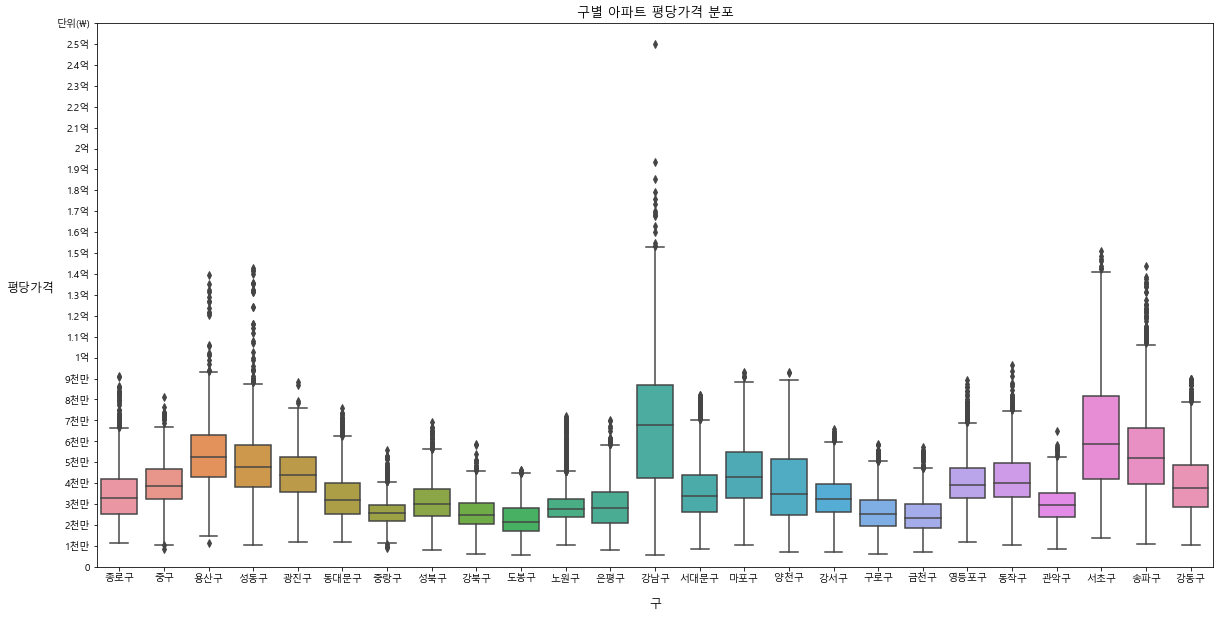

In [38]:
# boxplot으로 시각화
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim([0, 27000000])
ax.set_title('구별 아파트 평당가격 분포', size=13)
sns.boxplot(x='시군구명', y='평당가격', data=apt_py)
plt.xlabel('구', size= 12, labelpad=15)
plt.ylabel('평당가격', size= 12, rotation=0, labelpad=25)
plt.yticks(np.arange(0, 270000000, 10000000),
          ('0', '1천만','2천만','3천만','4천만','5천만','6천만','7천만','8천만','9천만',
          '1억','1.1억','1.2억','1.3억','1.4억','1.5억','1.6억','1.7억','1.8억','1.9억',
          '2억','2.1억','2.2억','2.3억','2.4억','2.5억', '단위(\)'))

plt.show()